### HOMEWORK 14

In [3]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


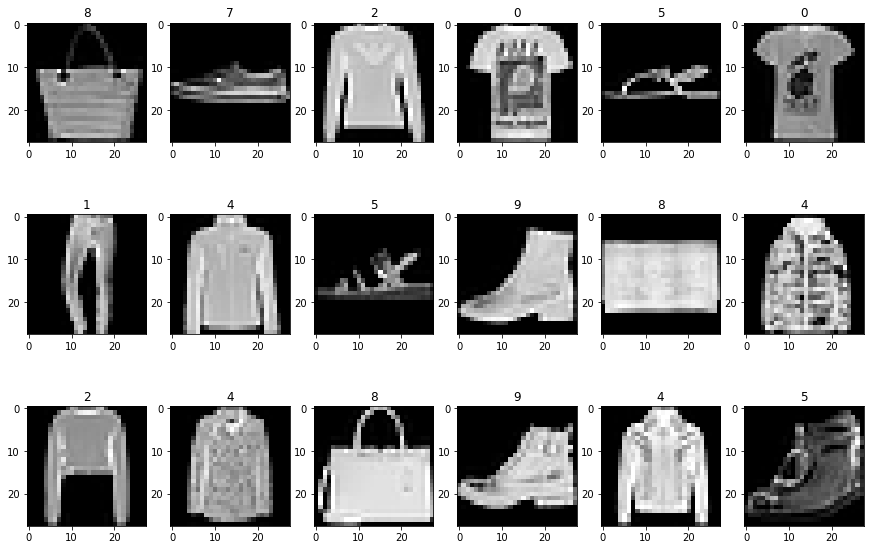

In [5]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

### Building the Classifier

In [6]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [7]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,213,002
Trainable params: 3,213,002
Non-trainable params: 0
_________________________________________________________________


In [9]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 85s 90ms/step - loss: 0.2718 - accuracy: 0.9037 - val_loss: 0.2971 - val_accuracy: 0.8938
Epoch 2/50
938/938 [==============================] - 78s 83ms/step - loss: 0.2206 - accuracy: 0.9219 - val_loss: 0.2933 - val_accuracy: 0.8976
Epoch 3/50
938/938 [==============================] - 77s 82ms/step - loss: 0.1877 - accuracy: 0.9316 - val_loss: 0.2976 - val_accuracy: 0.9000
Epoch 4/50
938/938 [==============================] - 78s 83ms/step - loss: 0.1609 - accuracy: 0.9415 - val_loss: 0.3129 - val_accuracy: 0.8994
Epoch 5/50
938/938 [==============================] - 76s 81ms/step - loss: 0.1412 - accuracy: 0.9488 - val_loss: 0.3254 - val_accuracy: 0.8983
Epoch 6/50
938/938 [==============================] - 80s 86ms/step - loss: 0.1243 - accuracy: 0.9551 - val_loss: 0.3407 - val_accuracy: 0.9017
Epoch 7/50
938/938 [==============================] - 77s 82ms/step - loss: 0.1098 - accuracy: 0.9595 - val_loss: 0.3935 - val_accuracy:

Train Acc      0.9955166578292847
Validation Acc 0.8794999718666077


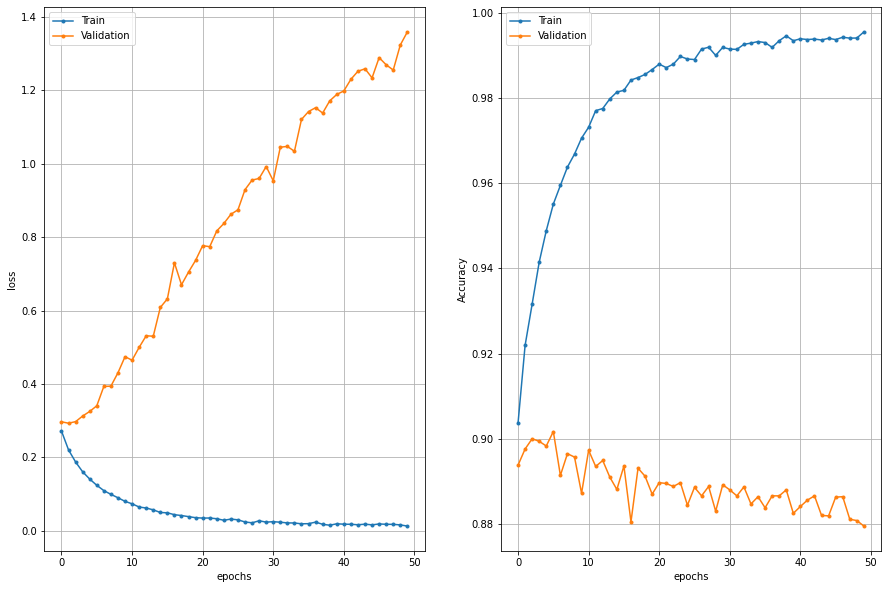

In [10]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

### Combat the Overfitting!

In [12]:
from sklearn.utils import shuffle

def datagen(x, y, batch_size):
    num_samples = len(y)
    while True:
        for idx in range(0, num_samples, batch_size):
            x_ = x[idx:idx + batch_size, ...]
            y_ = y[idx:idx + batch_size]
            
            if len(y_) < batch_size:
                x, y = shuffle(x, y)
                break
            
            # Augmentation
            for idx_aug in range(batch_size):
                if np.random.rand() > 0.5:
                    x_[idx_aug, ...] = np.fliplr(x_[idx_aug, ...])                                
                    
            yield x_, y_

In [13]:
# Modify the baseline classifier in order to reduce the overfitting and make the performance more robust

inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)
net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)
net = Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)
net = Conv2D(256, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                       

In [14]:
# Train the network
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 195s 205ms/step - loss: 0.5566 - accuracy: 0.7935 - val_loss: 0.3730 - val_accuracy: 0.8660
Epoch 2/50
938/938 [==============================] - 185s 197ms/step - loss: 0.3451 - accuracy: 0.8716 - val_loss: 0.2985 - val_accuracy: 0.8902
Epoch 3/50
938/938 [==============================] - 190s 202ms/step - loss: 0.2989 - accuracy: 0.8894 - val_loss: 0.2824 - val_accuracy: 0.8944
Epoch 4/50
938/938 [==============================] - 188s 201ms/step - loss: 0.2712 - accuracy: 0.8995 - val_loss: 0.2570 - val_accuracy: 0.9051
Epoch 5/50
938/938 [==============================] - 185s 197ms/step - loss: 0.2540 - accuracy: 0.9070 - val_loss: 0.2466 - val_accuracy: 0.9092
Epoch 6/50
938/938 [==============================] - 184s 197ms/step - loss: 0.2378 - accuracy: 0.9112 - val_loss: 0.2340 - val_accuracy: 0.9152
Epoch 7/50
938/938 [==============================] - 189s 202ms/step - loss: 0.2280 - accuracy: 0.9146 - val_loss: 0.2274 -

Train Acc      0.9557666778564453
Validation Acc 0.9279999732971191


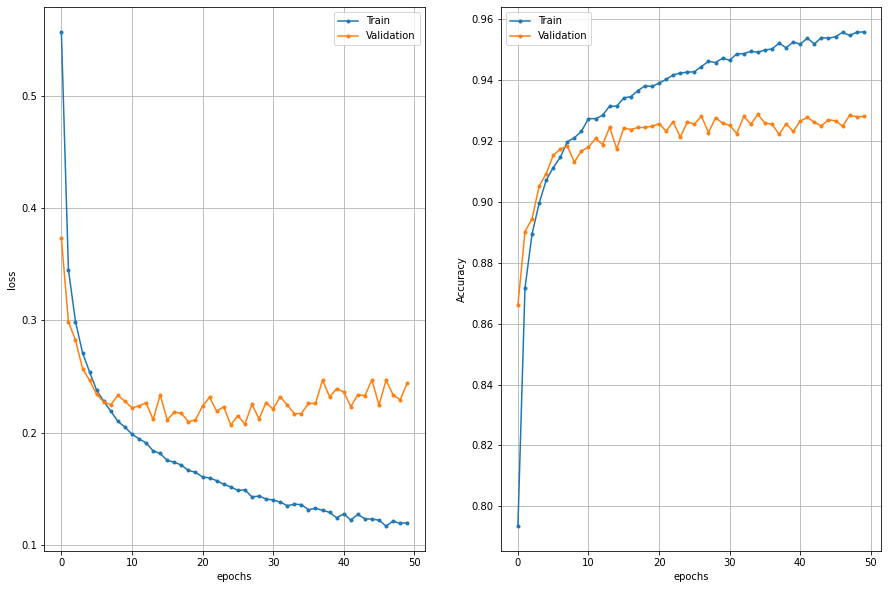

In [15]:
# Show the results
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

### Questions

### What have you done in order to improve the performance?
To improve the performance of our classifier I used the next techniques: 1) Dropouts 2) Data Augmentation (from lesson) 

This led us to the following results: 1) The value of the loss function is constantly decreasing until Epoch 46/50, than it started floating +- 0.1200 2) Accuracy: 0.9558 Val_accuracy: 0.9280 

### Have you tried configurations that did not work out?


No, cause unlucky for me it costs a lot of time on my machine, only this one configuration costs more than 2,5 hours :(